### Import some necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import data

In [2]:
data1 = pd.read_csv('application_record.csv')
data2 = pd.read_csv('credit_record.csv')

### Data overview

In [3]:
data1.shape

(438557, 18)

In [4]:
data2.shape

(1048575, 3)

In [5]:
data1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
data2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.00,6022176.27,571637.02,5008804.00,5609375.00,6047745.00,6456971.00,7999952.00
CNT_CHILDREN,438557.00,0.43,0.72,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,438557.00,187524.29,110086.85,26100.00,121500.00,160780.50,225000.00,6750000.00
DAYS_BIRTH,438557.00,-15997.90,4185.03,-25201.00,-19483.00,-15630.00,-12514.00,-7489.00
DAYS_EMPLOYED,438557.00,60563.68,138767.80,-17531.00,-3103.00,-1467.00,-371.00,365243.00
FLAG_MOBIL,438557.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
FLAG_WORK_PHONE,438557.00,0.21,0.40,0.00,0.00,0.00,0.00,1.00
FLAG_PHONE,438557.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00
FLAG_EMAIL,438557.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00
CNT_FAM_MEMBERS,438557.00,2.19,0.90,1.00,2.00,2.00,3.00,20.00


In [10]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.00,5068286.42,46150.58,5001711.00,5023644.00,5062104.00,5113856.00,5150487.00
MONTHS_BALANCE,1048575.00,-19.14,14.02,-60.00,-29.00,-17.00,-7.00,0.00


## Application Record Data Analyze and Cleaning

In [11]:
# Classification variables
class_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
# Continuous variables
conti_cols = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
# Discrete variables
discrete_cols = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

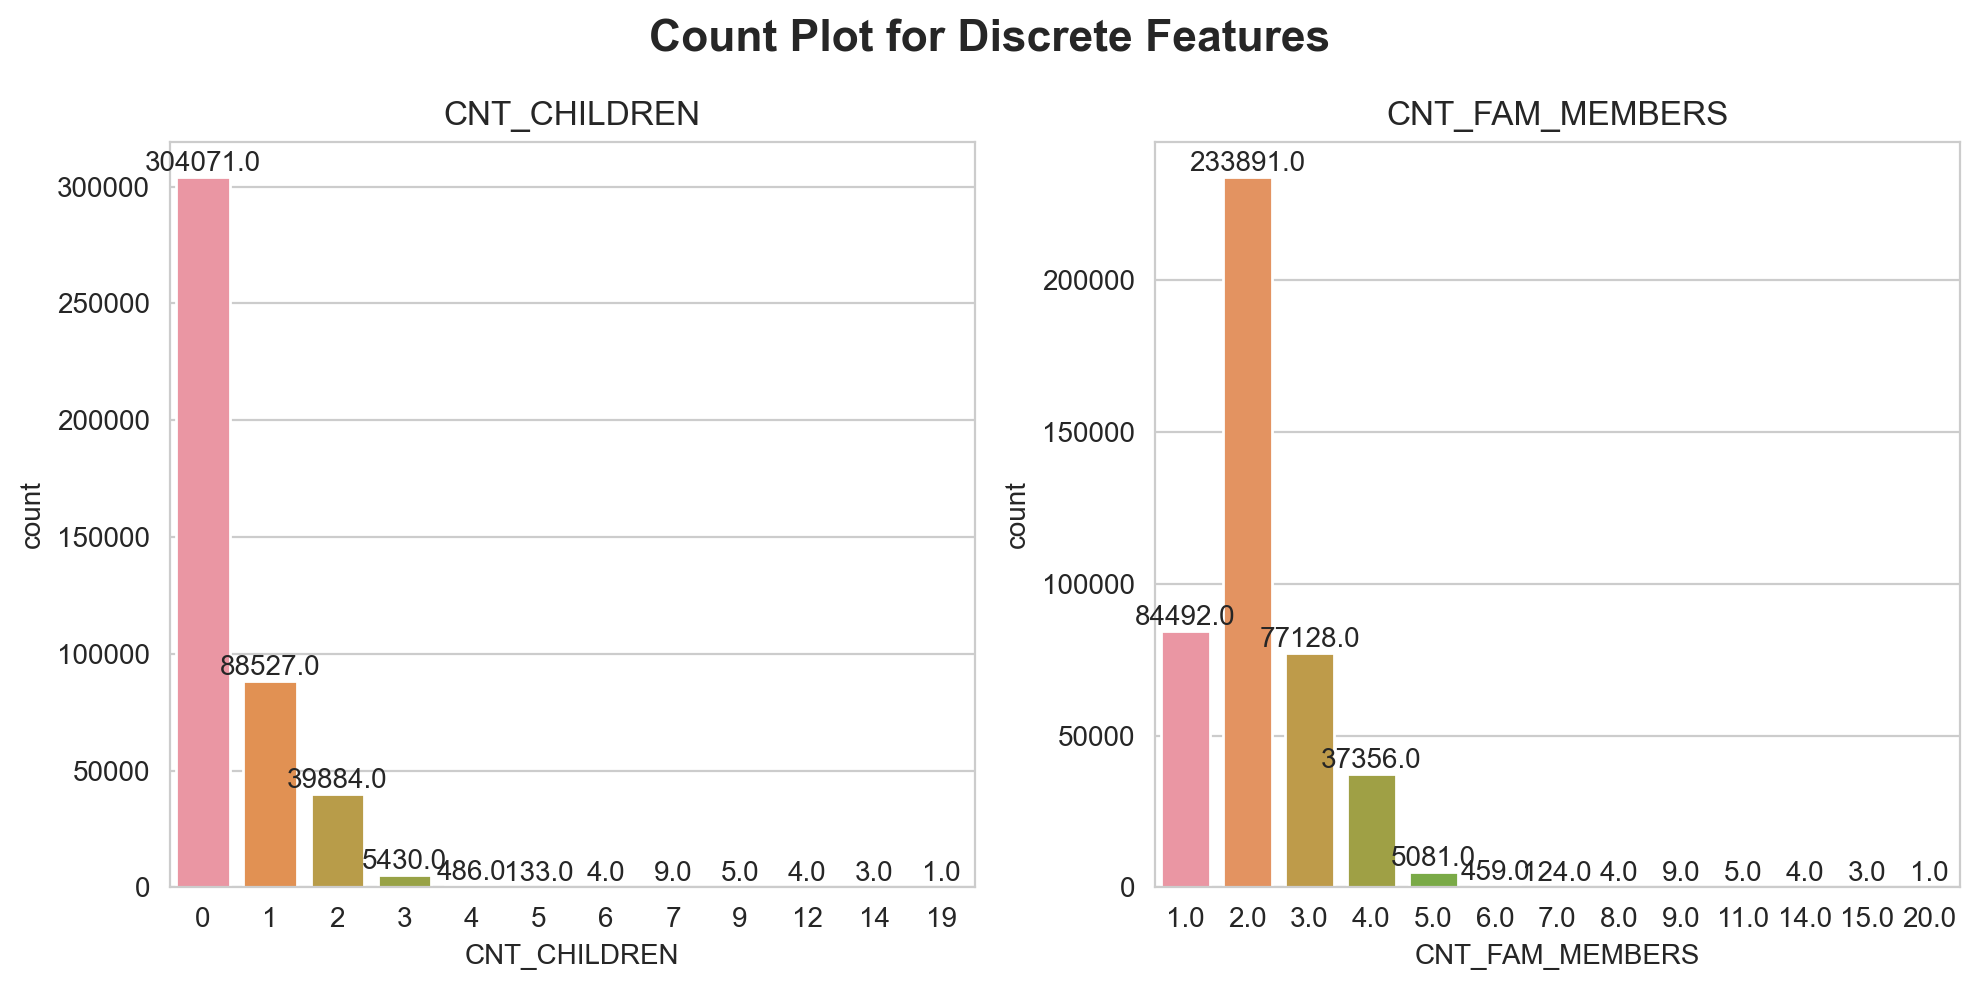

In [12]:
# Create a subplot grid with 1 row and a number of columns equal to the number of discrete features
# Set the figure size to 10x5 inches and the DPI to 200 for high resolution
fig, axes = plt.subplots(1, len(discrete_cols), figsize=(10, 5), dpi=200)

# Set the main title for the entire figure
fig.suptitle('Count Plot for Discrete Features', fontsize=16, fontweight='bold')

# Loop through each axis object and the corresponding discrete feature
for ax, variable in zip(axes, discrete_cols):
    # Create a count plot for the discrete feature on the current axis
    sns.countplot(x=variable, data=data1, ax=ax)
    
    # Set the title of the subplot to the name of the discrete feature
    ax.set_title(variable)
    
    # Display count labels on each bar in the count plot
    for p in ax.patches:
        # Get the height of the current bar
        height = p.get_height()
        # Annotate the bar with its height value, placing the text in the center of the bar
        ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom')

# Adjust the layout to ensure that subplots fit within the figure area
plt.tight_layout()

plt.show()

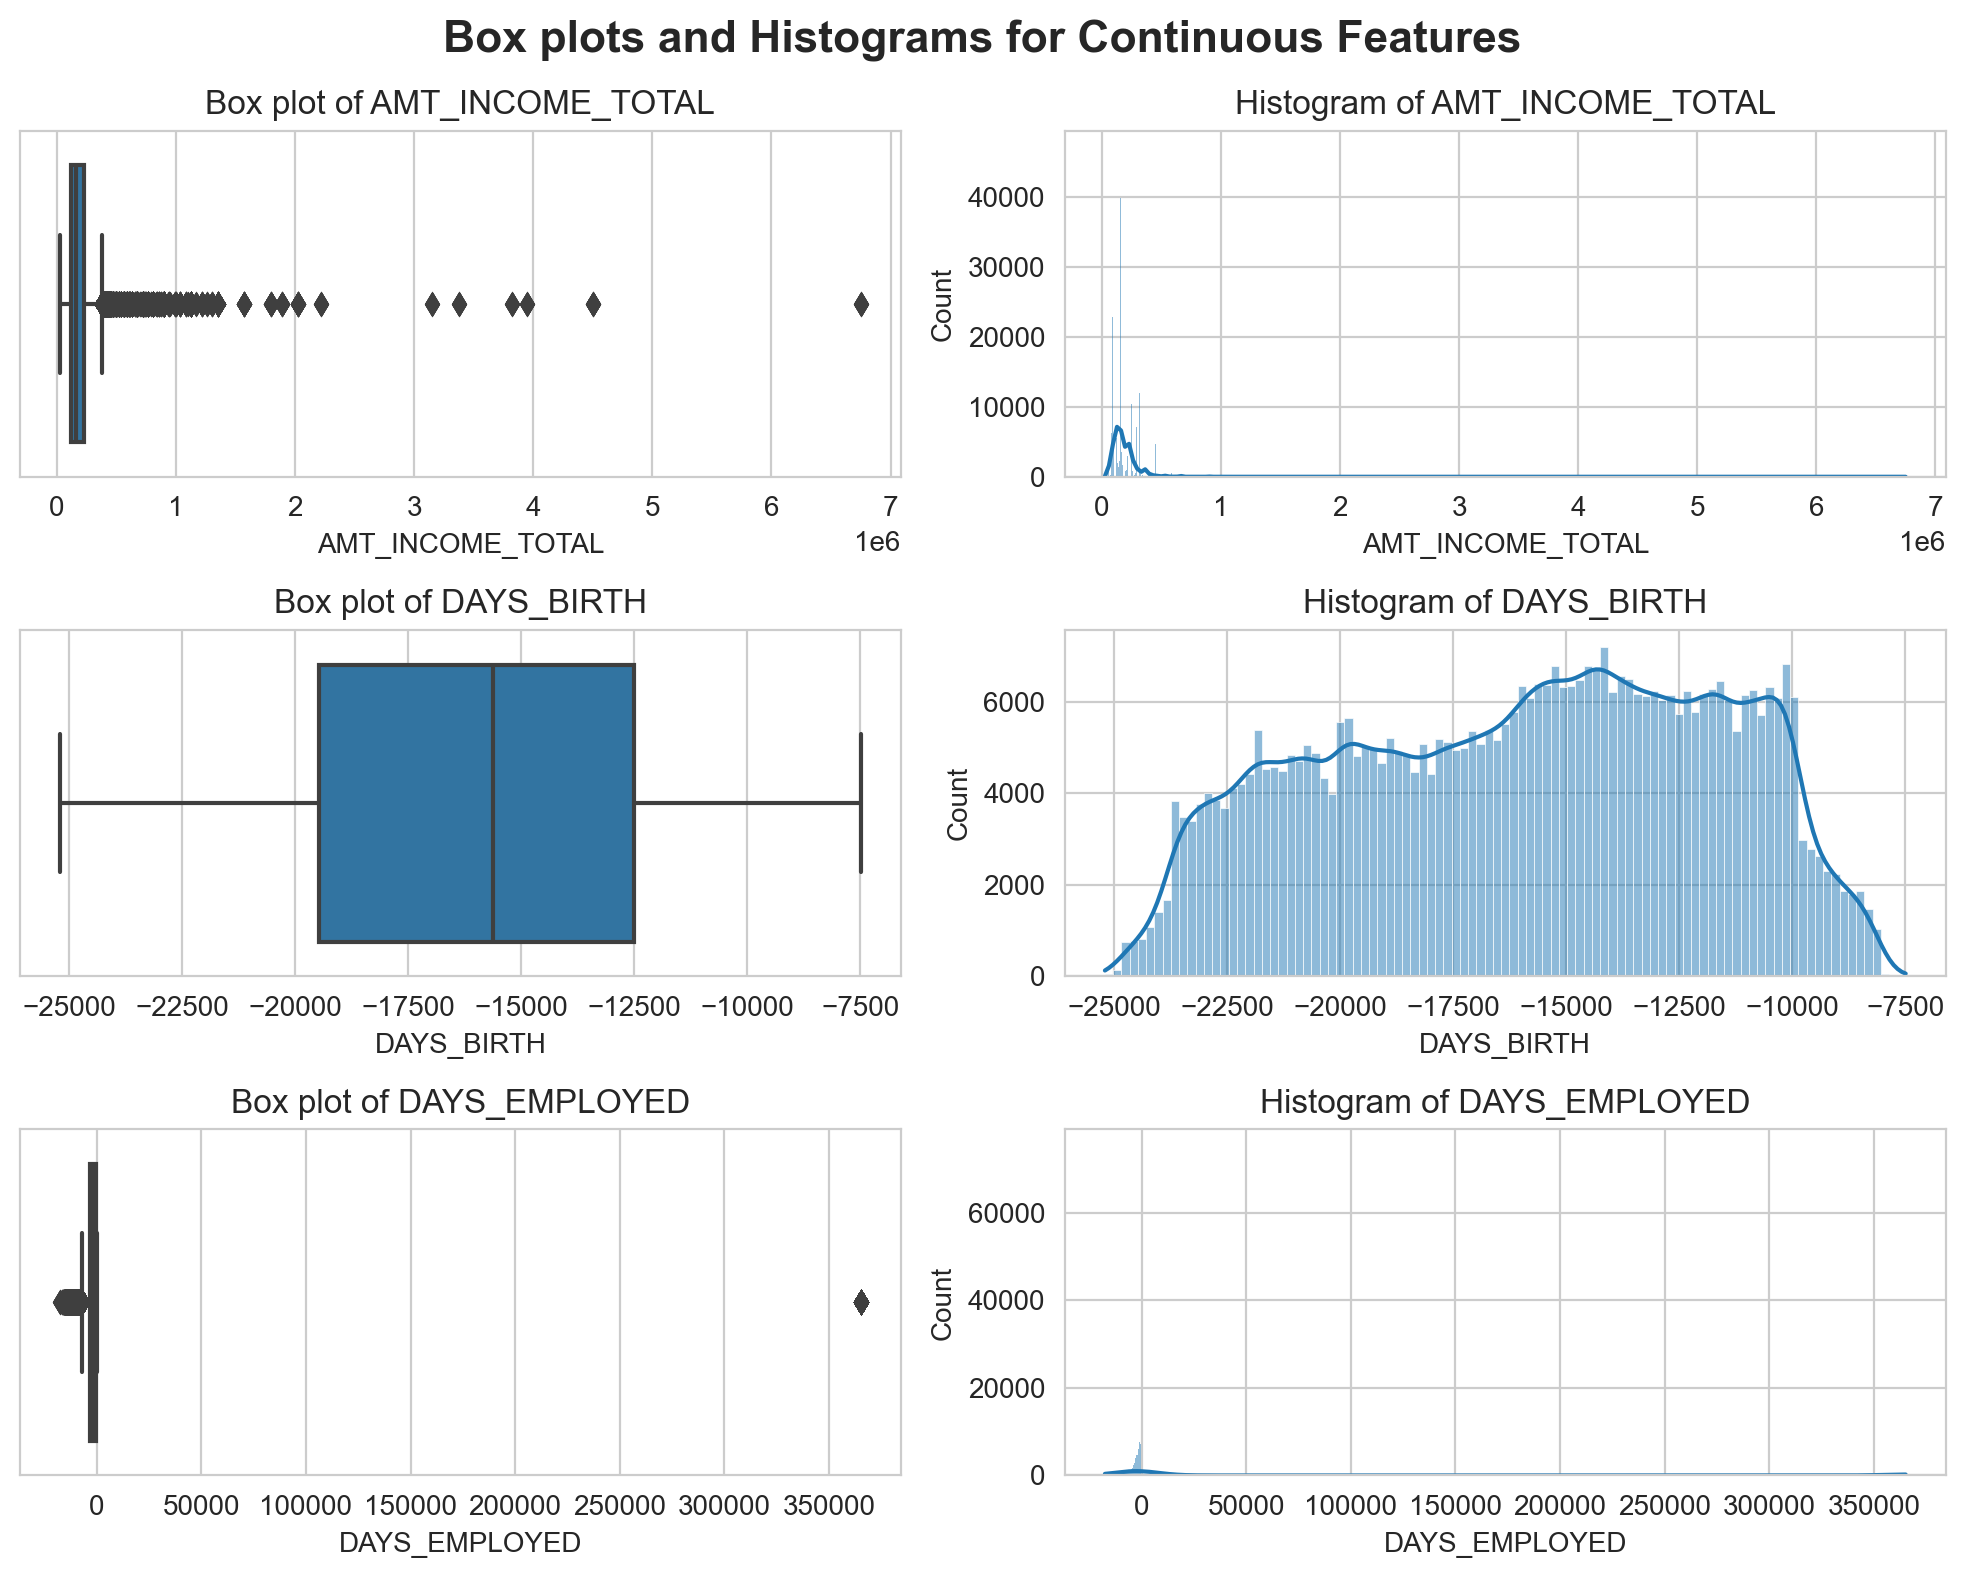

In [13]:
# Create a subplot grid with a number of rows equal to the number of continuous features
# and 2 columns for box plots and histograms
fig, axes = plt.subplots(len(conti_cols), 2, figsize=(10, 8), dpi=200)

# Set the main title for the entire figure
fig.suptitle('Box plots and Histograms for Continuous Features', fontsize=16, fontweight='bold')

# Loop through each continuous feature and its corresponding subplot row index
for i, variable in enumerate(conti_cols):
    # Create a box plot for the current feature on the left column
    sns.boxplot(x=data1[variable], ax=axes[i, 0])
    axes[i, 0].set_title(f'Box plot of {variable}')
    
    # Create a histogram for the current feature on the right column, with KDE overlay
    sns.histplot(data1[variable], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Histogram of {variable}')

# Adjust the layout to ensure that subplots fit within the figure area
plt.tight_layout()
plt.show()

From the above figure, it is found that the distribution of DAYS_EMPLOYED is very abnormal, so the serious outly value is filtered and eliminated.

In [14]:
data1[data1['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

array([365243])

In [15]:
data1[data1['DAYS_EMPLOYED'] == 365243].shape

(75329, 18)

In [16]:
data1 = data1[data1['DAYS_EMPLOYED'] != 365243]
data1.shape

(363228, 18)

From the above figure, it is found that the distribution of AMT_INCOME_TOTAL is also abnormal, so the outly value is filtered.

In [17]:
# > 75th percentile
data1[data1['AMT_INCOME_TOTAL'] > 2250000].shape

(40, 18)

In [18]:
data1[data1['AMT_INCOME_TOTAL'] > 600000.0].shape[0]

2752

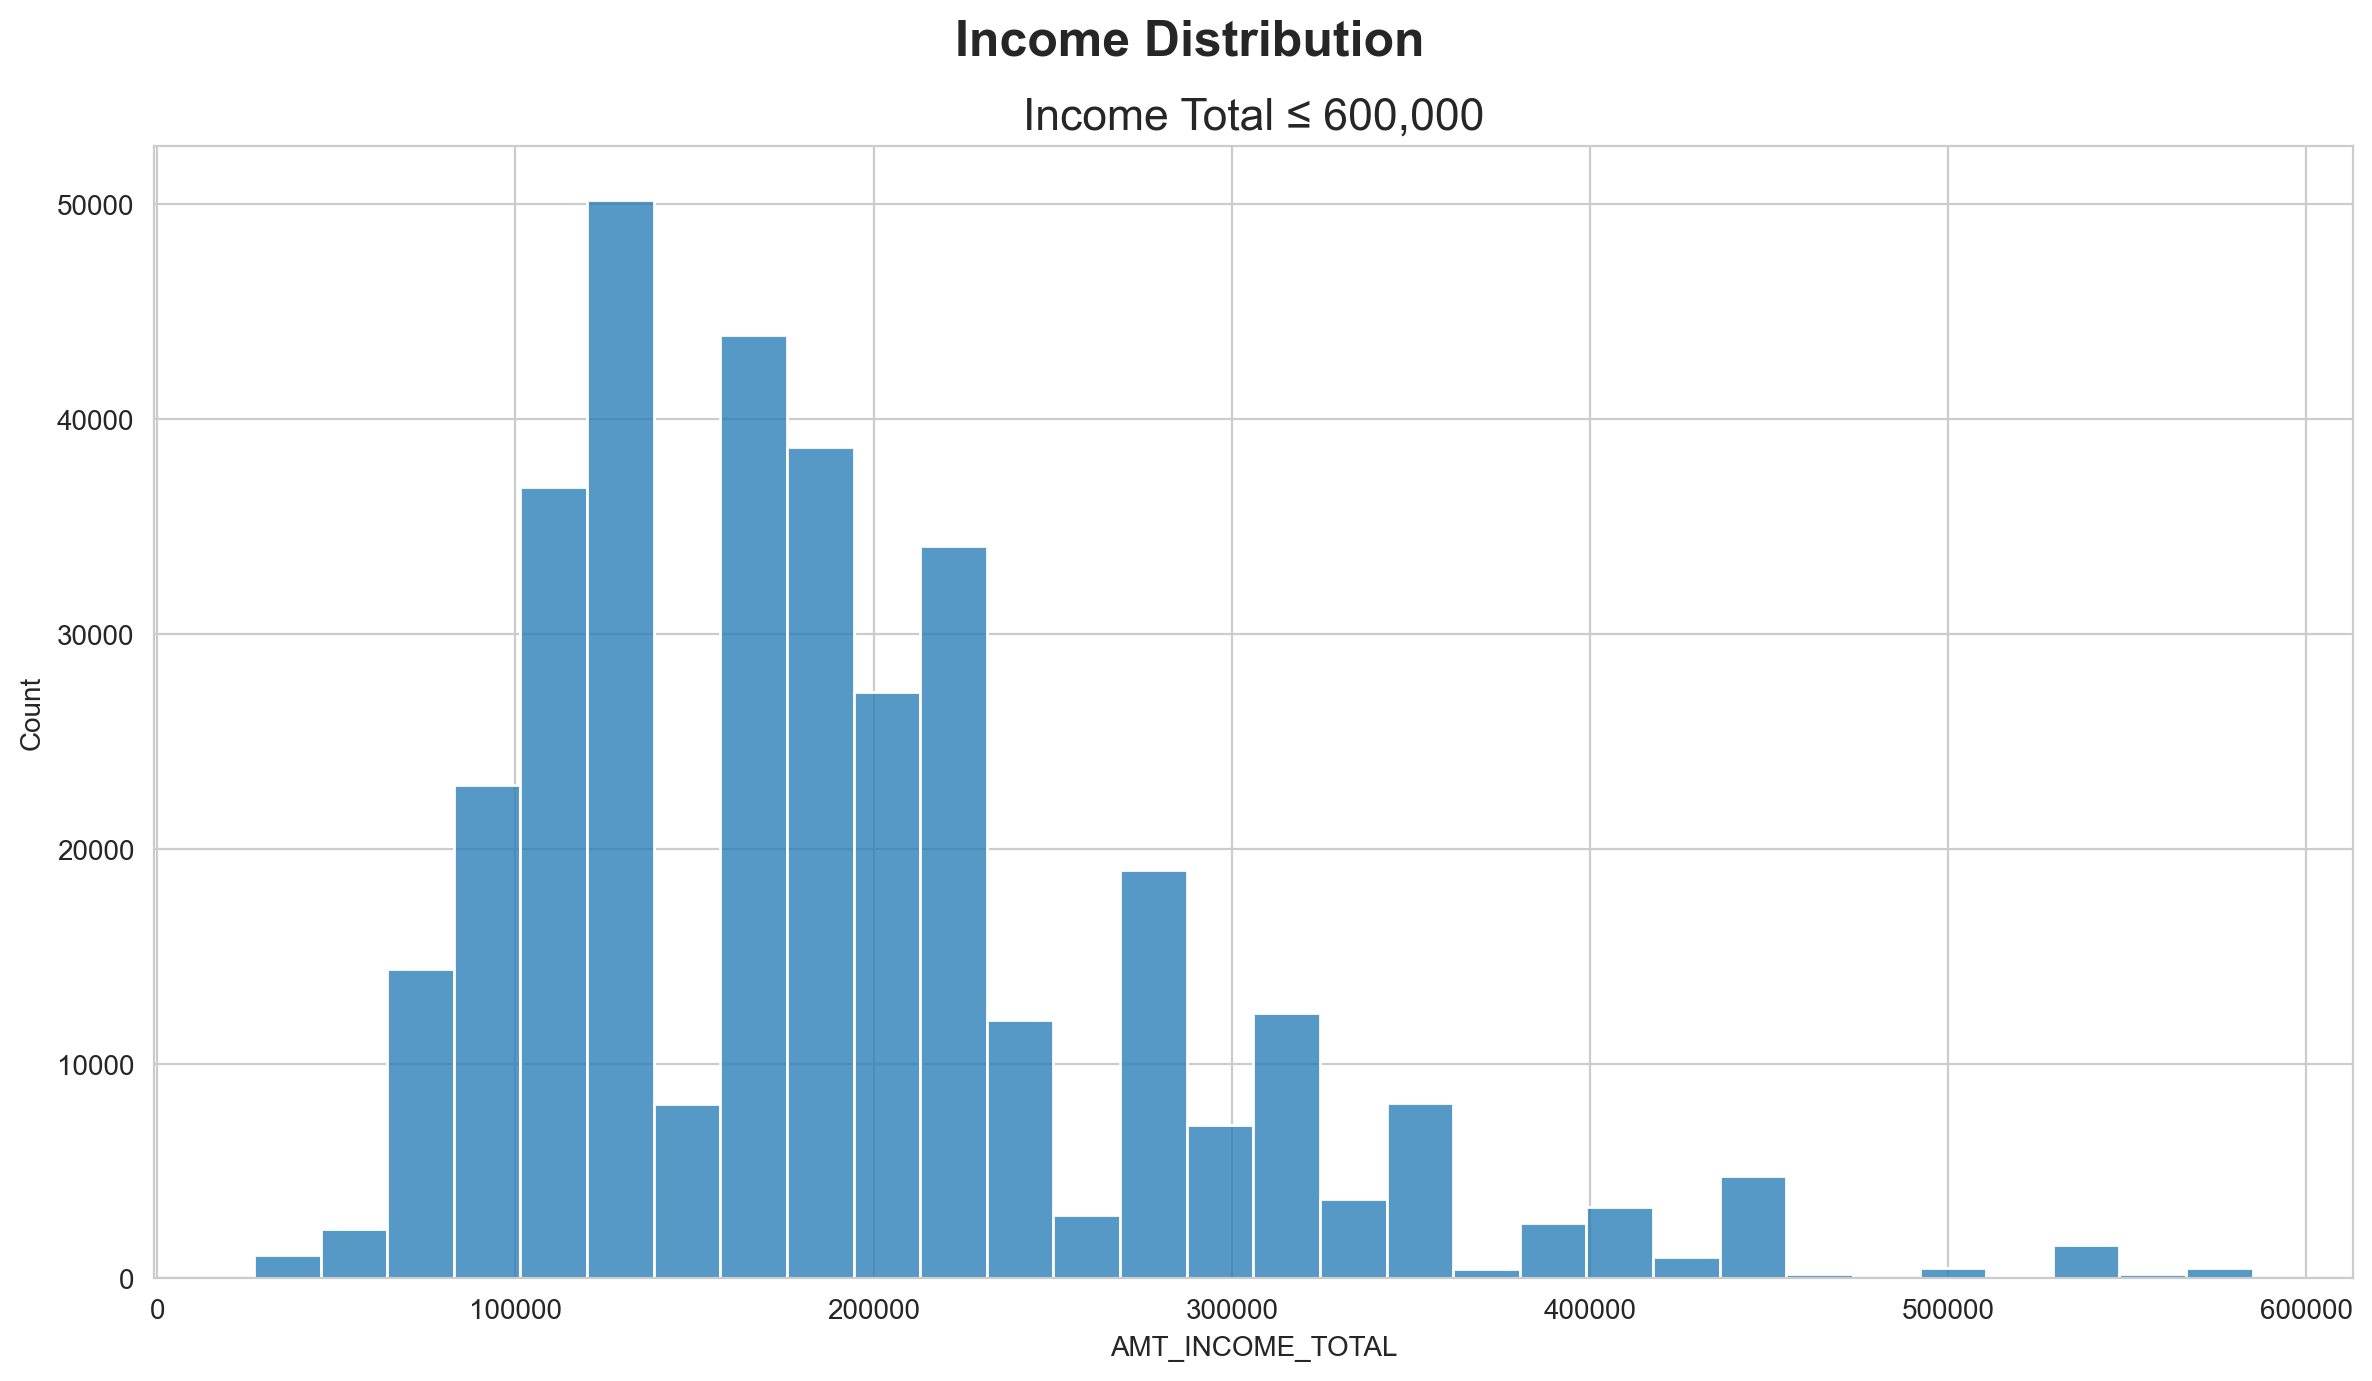

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi=200)
fig.suptitle('Income Distribution', fontsize=18, fontweight='bold')

# Filter the dataframe to include only rows where 'AMT_INCOME_TOTAL' is less than or equal to 600,000
filtered_df = data1[data1['AMT_INCOME_TOTAL'] <= 600000]

# Create a histogram for the filtered income data
sns.histplot(filtered_df['AMT_INCOME_TOTAL'], ax=ax, bins=30)

# Set the title for the histogram
ax.set_title('Income Total ≤ 600,000', fontsize=16)

plt.tight_layout()
plt.show()

In [20]:
# Filter the dataframe to include only rows where 'AMT_INCOME_TOTAL' is less than or equal to 600,000
data1 = data1[data1['AMT_INCOME_TOTAL'] <= 600000]
data1.shape

(360476, 18)

In [21]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,360476.00,6022947.54,570474.00,5008804.00,5617519.75,6047919.50,6448860.25,7999952.00
CNT_CHILDREN,360476.00,0.51,0.76,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,360476.00,189476.76,87449.89,27000.00,135000.00,180000.00,225000.00,585000.00
DAYS_BIRTH,360476.00,-14804.46,3501.82,-24834.00,-17448.00,-14568.50,-11928.00,-7489.00
DAYS_EMPLOYED,360476.00,-2622.06,2400.85,-17531.00,-3511.00,-1923.00,-912.00,-12.00
FLAG_MOBIL,360476.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
FLAG_WORK_PHONE,360476.00,0.25,0.43,0.00,0.00,0.00,0.00,1.00
FLAG_PHONE,360476.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00
FLAG_EMAIL,360476.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
CNT_FAM_MEMBERS,360476.00,2.29,0.93,1.00,2.00,2.00,3.00,20.00


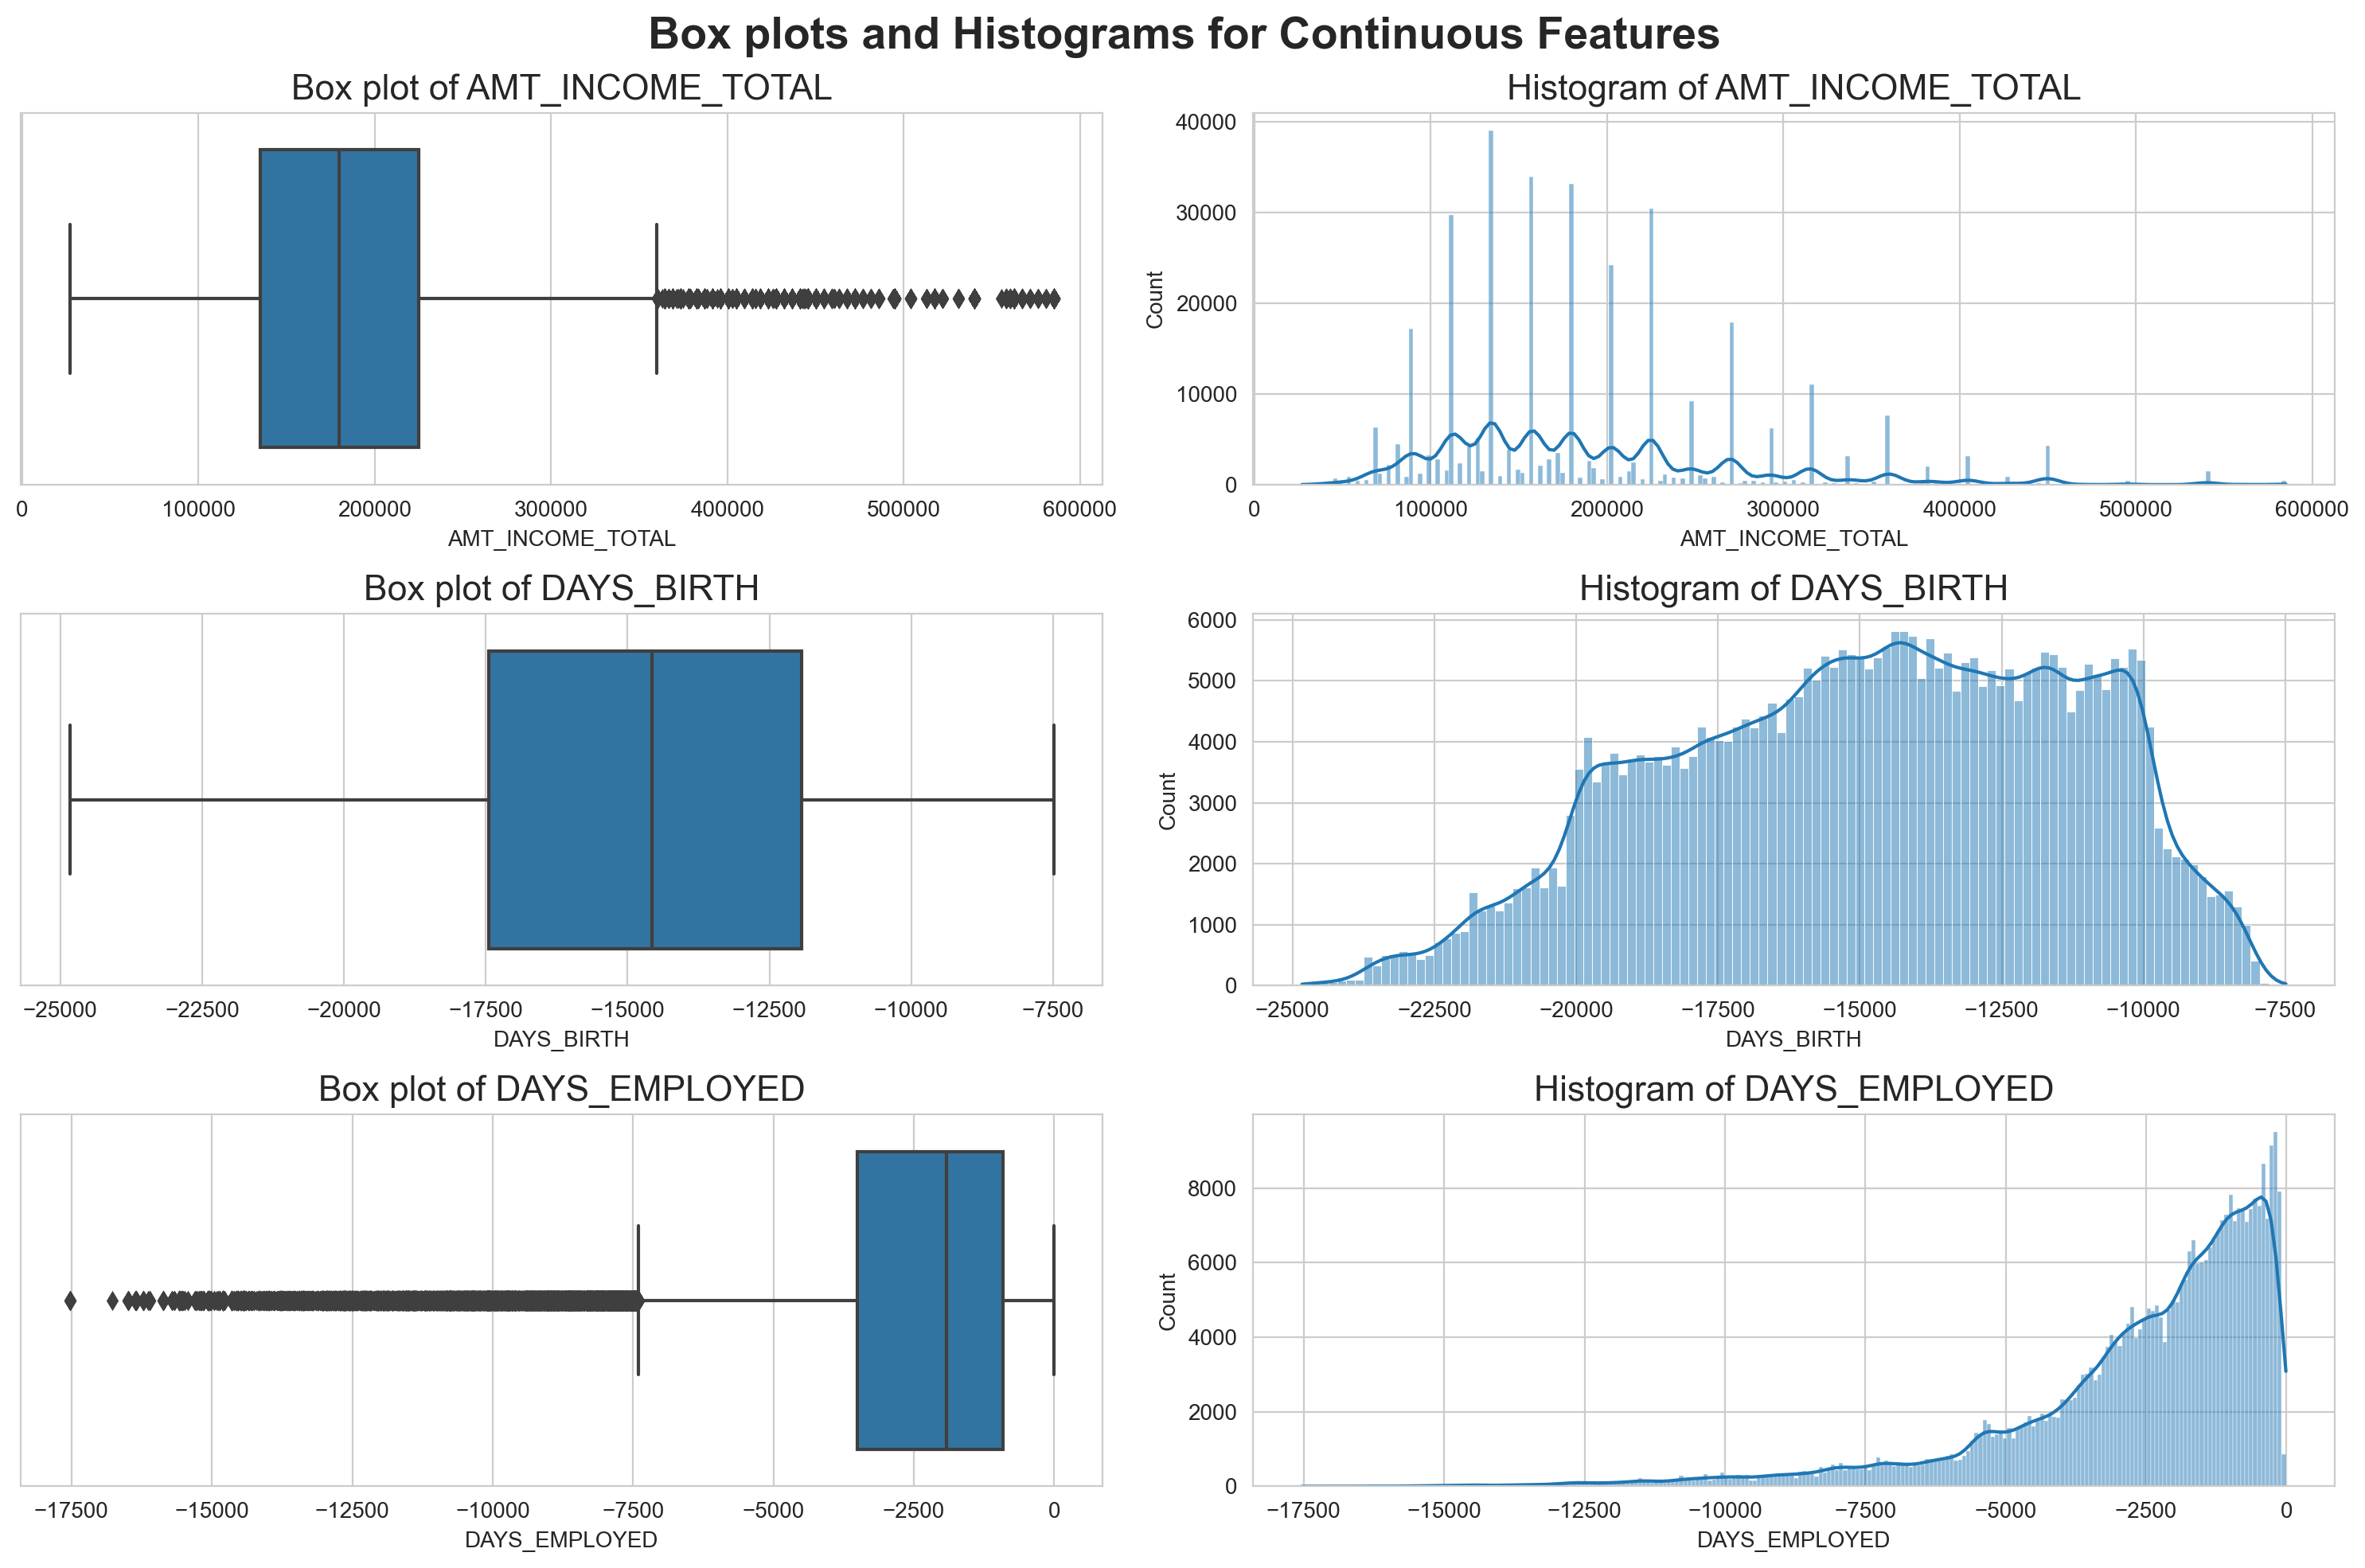

In [22]:
# Create a subplot grid with rows equal to the number of continuous features and 2 columns
fig, axes = plt.subplots(len(conti_cols), 2, figsize=(15, 10), dpi=200)

fig.suptitle('Box plots and Histograms for Continuous Features', fontsize=20, fontweight='bold')

# Loop through each continuous feature and its corresponding subplot row index
for i, variable in enumerate(conti_cols):
    # Create a box plot for the current feature in the left column
    sns.boxplot(x=data1[variable], ax=axes[i, 0])
    axes[i, 0].set_title(f'Box plot of {variable}', fontsize=16)
    
    # Create a histogram for the current feature in the right column, with KDE overlay
    sns.histplot(data1[variable], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Histogram of {variable}', fontsize=16)

plt.tight_layout()
plt.show()

### converting them to years and flipping them to positive values

In [23]:
# Convert 'DAYS_BIRTH' from negative days to positive years
data1['DAYS_BIRTH'] = abs(data1['DAYS_BIRTH']) / 365

# Convert 'DAYS_EMPLOYED' from negative days to positive years
data1['DAYS_EMPLOYED'] = abs(data1['DAYS_EMPLOYED']) / 365

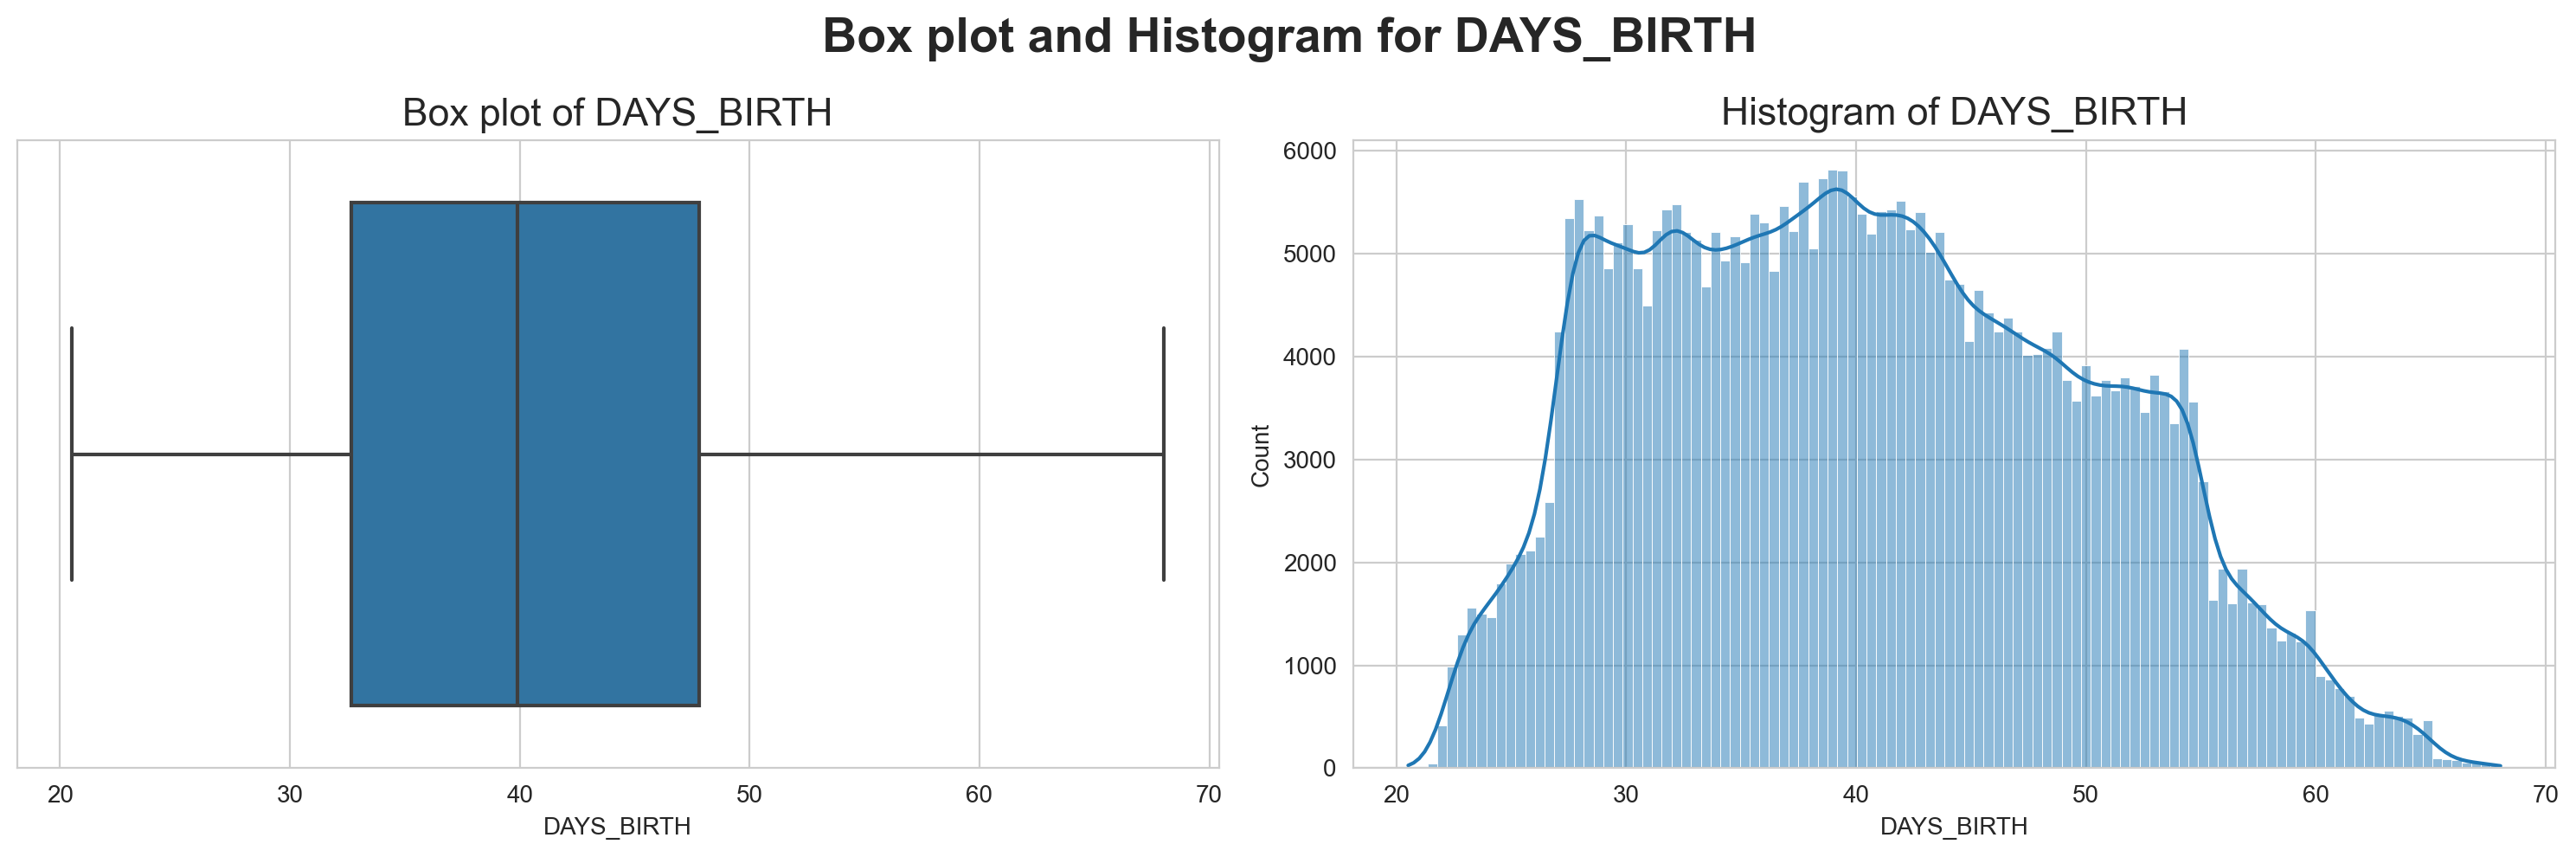

In [24]:
# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=200)

fig.suptitle('Box plot and Histogram for DAYS_BIRTH', fontsize=20, fontweight='bold')

# Create a box plot for 'DAYS_BIRTH' in the first subplot
sns.boxplot(x=data1['DAYS_BIRTH'], ax=axes[0])
axes[0].set_title('Box plot of DAYS_BIRTH', fontsize=16)

# Create a histogram with KDE for 'DAYS_BIRTH' in the second subplot
sns.histplot(data1['DAYS_BIRTH'], ax=axes[1], kde=True)
axes[1].set_title('Histogram of DAYS_BIRTH', fontsize=16)

# Display the final plot
plt.tight_layout()
plt.show()

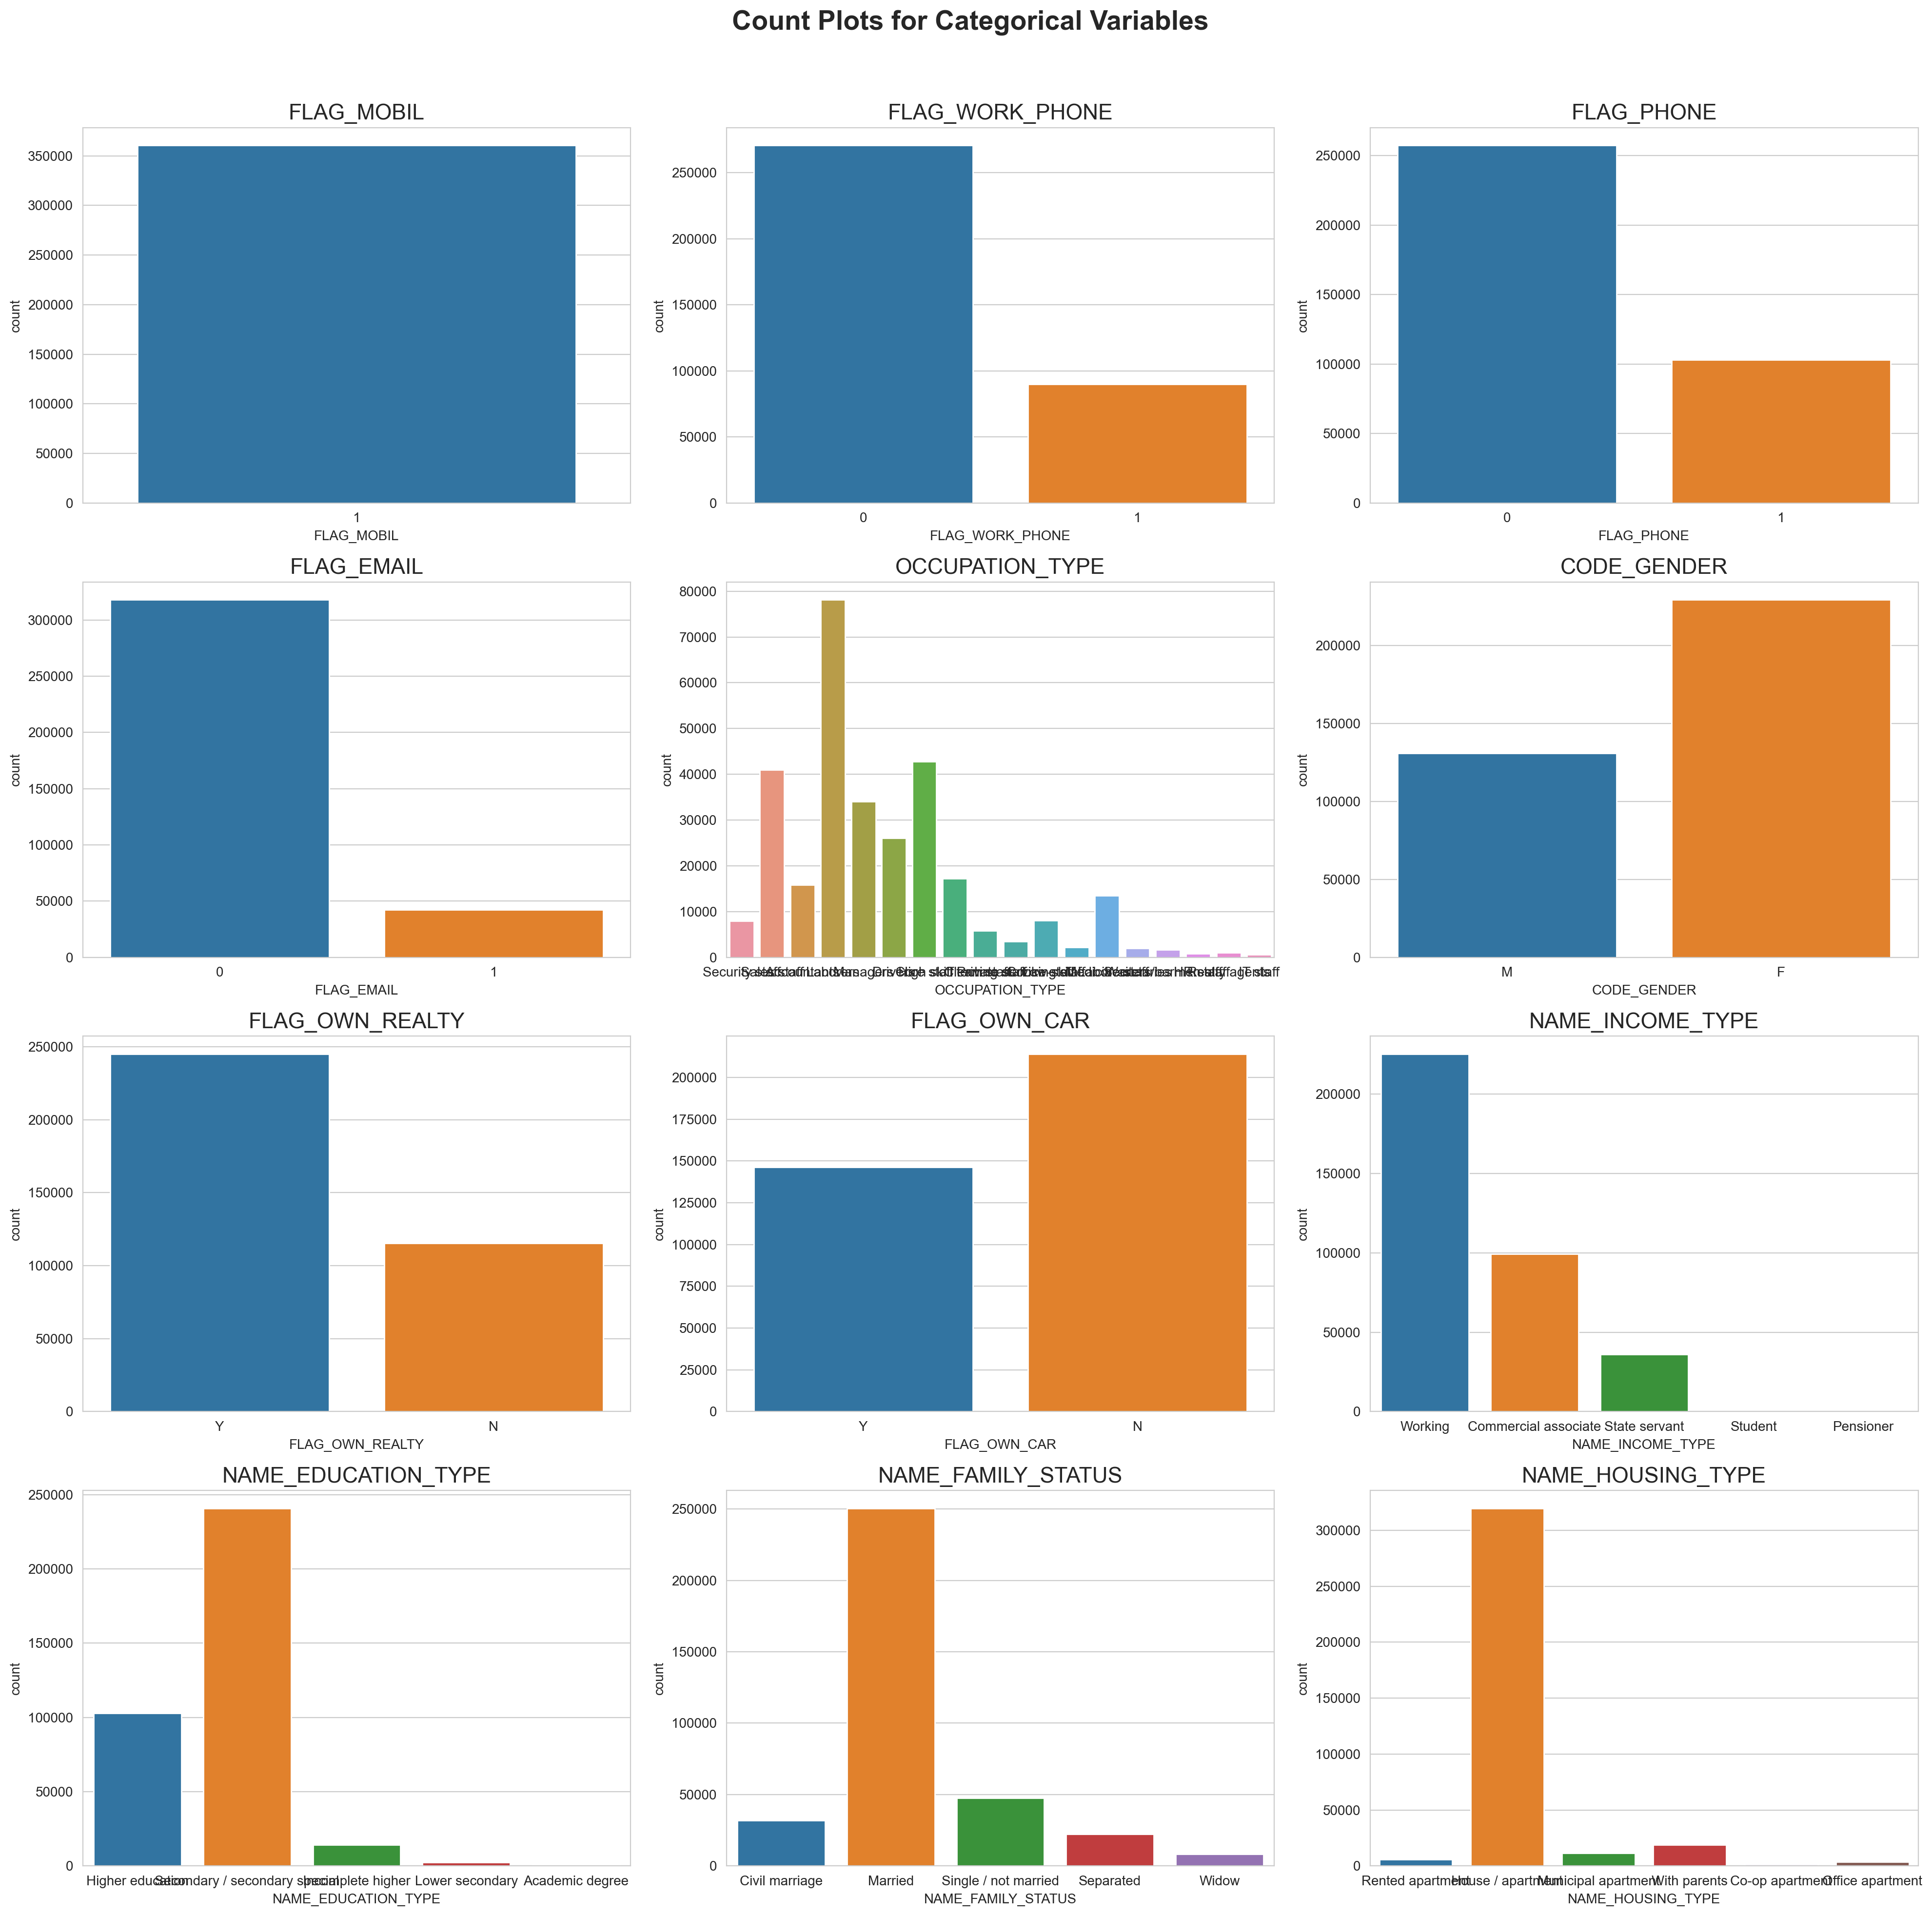

In [25]:
# Determine the number of rows and columns of the subgraph
n_cols = 3
n_rows = (len(class_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), dpi = 200)
fig.suptitle('Count Plots for Categorical Variables', fontsize=20, fontweight='bold')

# Flatten axes to facilitate indexing
axes = axes.flatten()

for i, col in enumerate(class_cols):
    sns.countplot(x=col, data=data1, ax=axes[i])
    axes[i].set_title(col, fontsize=16)

# Hide redundant subgraphs
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

There are missing data of the OCCUPATION_TYPE variable, so we remove missing data.

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360476 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   360476 non-null  int64  
 1   CODE_GENDER          360476 non-null  object 
 2   FLAG_OWN_CAR         360476 non-null  object 
 3   FLAG_OWN_REALTY      360476 non-null  object 
 4   CNT_CHILDREN         360476 non-null  int64  
 5   AMT_INCOME_TOTAL     360476 non-null  float64
 6   NAME_INCOME_TYPE     360476 non-null  object 
 7   NAME_EDUCATION_TYPE  360476 non-null  object 
 8   NAME_FAMILY_STATUS   360476 non-null  object 
 9   NAME_HOUSING_TYPE    360476 non-null  object 
 10  DAYS_BIRTH           360476 non-null  float64
 11  DAYS_EMPLOYED        360476 non-null  float64
 12  FLAG_MOBIL           360476 non-null  int64  
 13  FLAG_WORK_PHONE      360476 non-null  int64  
 14  FLAG_PHONE           360476 non-null  int64  
 15  FLAG_EMAIL           3

In [27]:
data1.dropna(inplace=True)
data1.shape

(301998, 18)

## Feature Engineering

In [28]:
# Define a mapping from education levels to numeric values
education_mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

# Map the education levels in 'NAME_EDUCATION_TYPE' to numeric values using the defined mapping
data1['Education_Level'] = data1['NAME_EDUCATION_TYPE'].map(education_mapping)

# Drop the original 'NAME_EDUCATION_TYPE' column
data1.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)

class_cols.append('Education_Level')
class_cols.remove('NAME_EDUCATION_TYPE')

data1['Education_Level'].value_counts()

Education_Level
2    204200
4     84003
3     11541
1      2039
5       215
Name: count, dtype: int64

In [29]:
# Standardize and map 'CODE_GENDER' values: 'M' to 1, 'F' to 0
data1['CODE_GENDER'] = data1['CODE_GENDER'].str.strip().str.upper()
data1['CODE_GENDER'] = data1['CODE_GENDER'].map({'M': 1, 'F': 0})

# Standardize and map 'FLAG_OWN_REALTY' values: 'Y' to 1, 'N' to 0
data1['FLAG_OWN_REALTY'] = data1['FLAG_OWN_REALTY'].str.strip().str.upper()
data1['FLAG_OWN_REALTY'] = data1['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

# Standardize and map 'FLAG_OWN_CAR' values: 'Y' to 1, 'N' to 0
data1['FLAG_OWN_CAR'] = data1['FLAG_OWN_CAR'].str.strip().str.upper()
data1['FLAG_OWN_CAR'] = data1['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

print(data1['CODE_GENDER'].value_counts())
print(data1['FLAG_OWN_REALTY'].value_counts())
print(data1['FLAG_OWN_CAR'].value_counts())

CODE_GENDER
0    189360
1    112638
Name: count, dtype: int64
FLAG_OWN_REALTY
1    205963
0     96035
Name: count, dtype: int64
FLAG_OWN_CAR
0    177569
1    124429
Name: count, dtype: int64


In [30]:
# Define mappings for various categorical columns to numeric values
income_type_mapping = {
    'Student': 1,
    'Pensioner': 2,
    'State servant': 3,
    'Working': 4,
    'Commercial associate': 5
}

family_status_mapping = {
    'Widow': 1,
    'Separated': 2,
    'Single / not married': 3,
    'Civil marriage': 4,
    'Married': 5
}

housing_type_mapping = {
    'With parents': 1,
    'Rented apartment': 2,
    'Municipal apartment': 3,
    'Co-op apartment': 4,
    'Office apartment': 5,
    'House / apartment': 6
}

occupation_type_mapping = {
    'Low-skill Laborers': 1,
    'Cleaning staff': 2,
    'Cooking staff': 2,
    'Waiters/barmen staff': 2,
    'Security staff': 3,
    'Sales staff': 3,
    'Laborers': 3,
    'Drivers': 3,
    'Medicine staff': 4,
    'Secretaries': 4,
    'HR staff': 4,
    'Accountants': 5,
    'Core staff': 5,
    'Realty agents': 5,
    'Private service staff': 6,
    'High skill tech staff': 6,
    'Managers': 7,
    'IT staff': 7
}

# Map the categorical columns to their corresponding numeric values using the defined mappings
data1['NAME_INCOME_TYPE'] = data1['NAME_INCOME_TYPE'].map(income_type_mapping)
data1['NAME_FAMILY_STATUS'] = data1['NAME_FAMILY_STATUS'].map(family_status_mapping)
data1['NAME_HOUSING_TYPE'] = data1['NAME_HOUSING_TYPE'].map(housing_type_mapping)
data1['OCCUPATION_TYPE'] = data1['OCCUPATION_TYPE'].map(occupation_type_mapping)

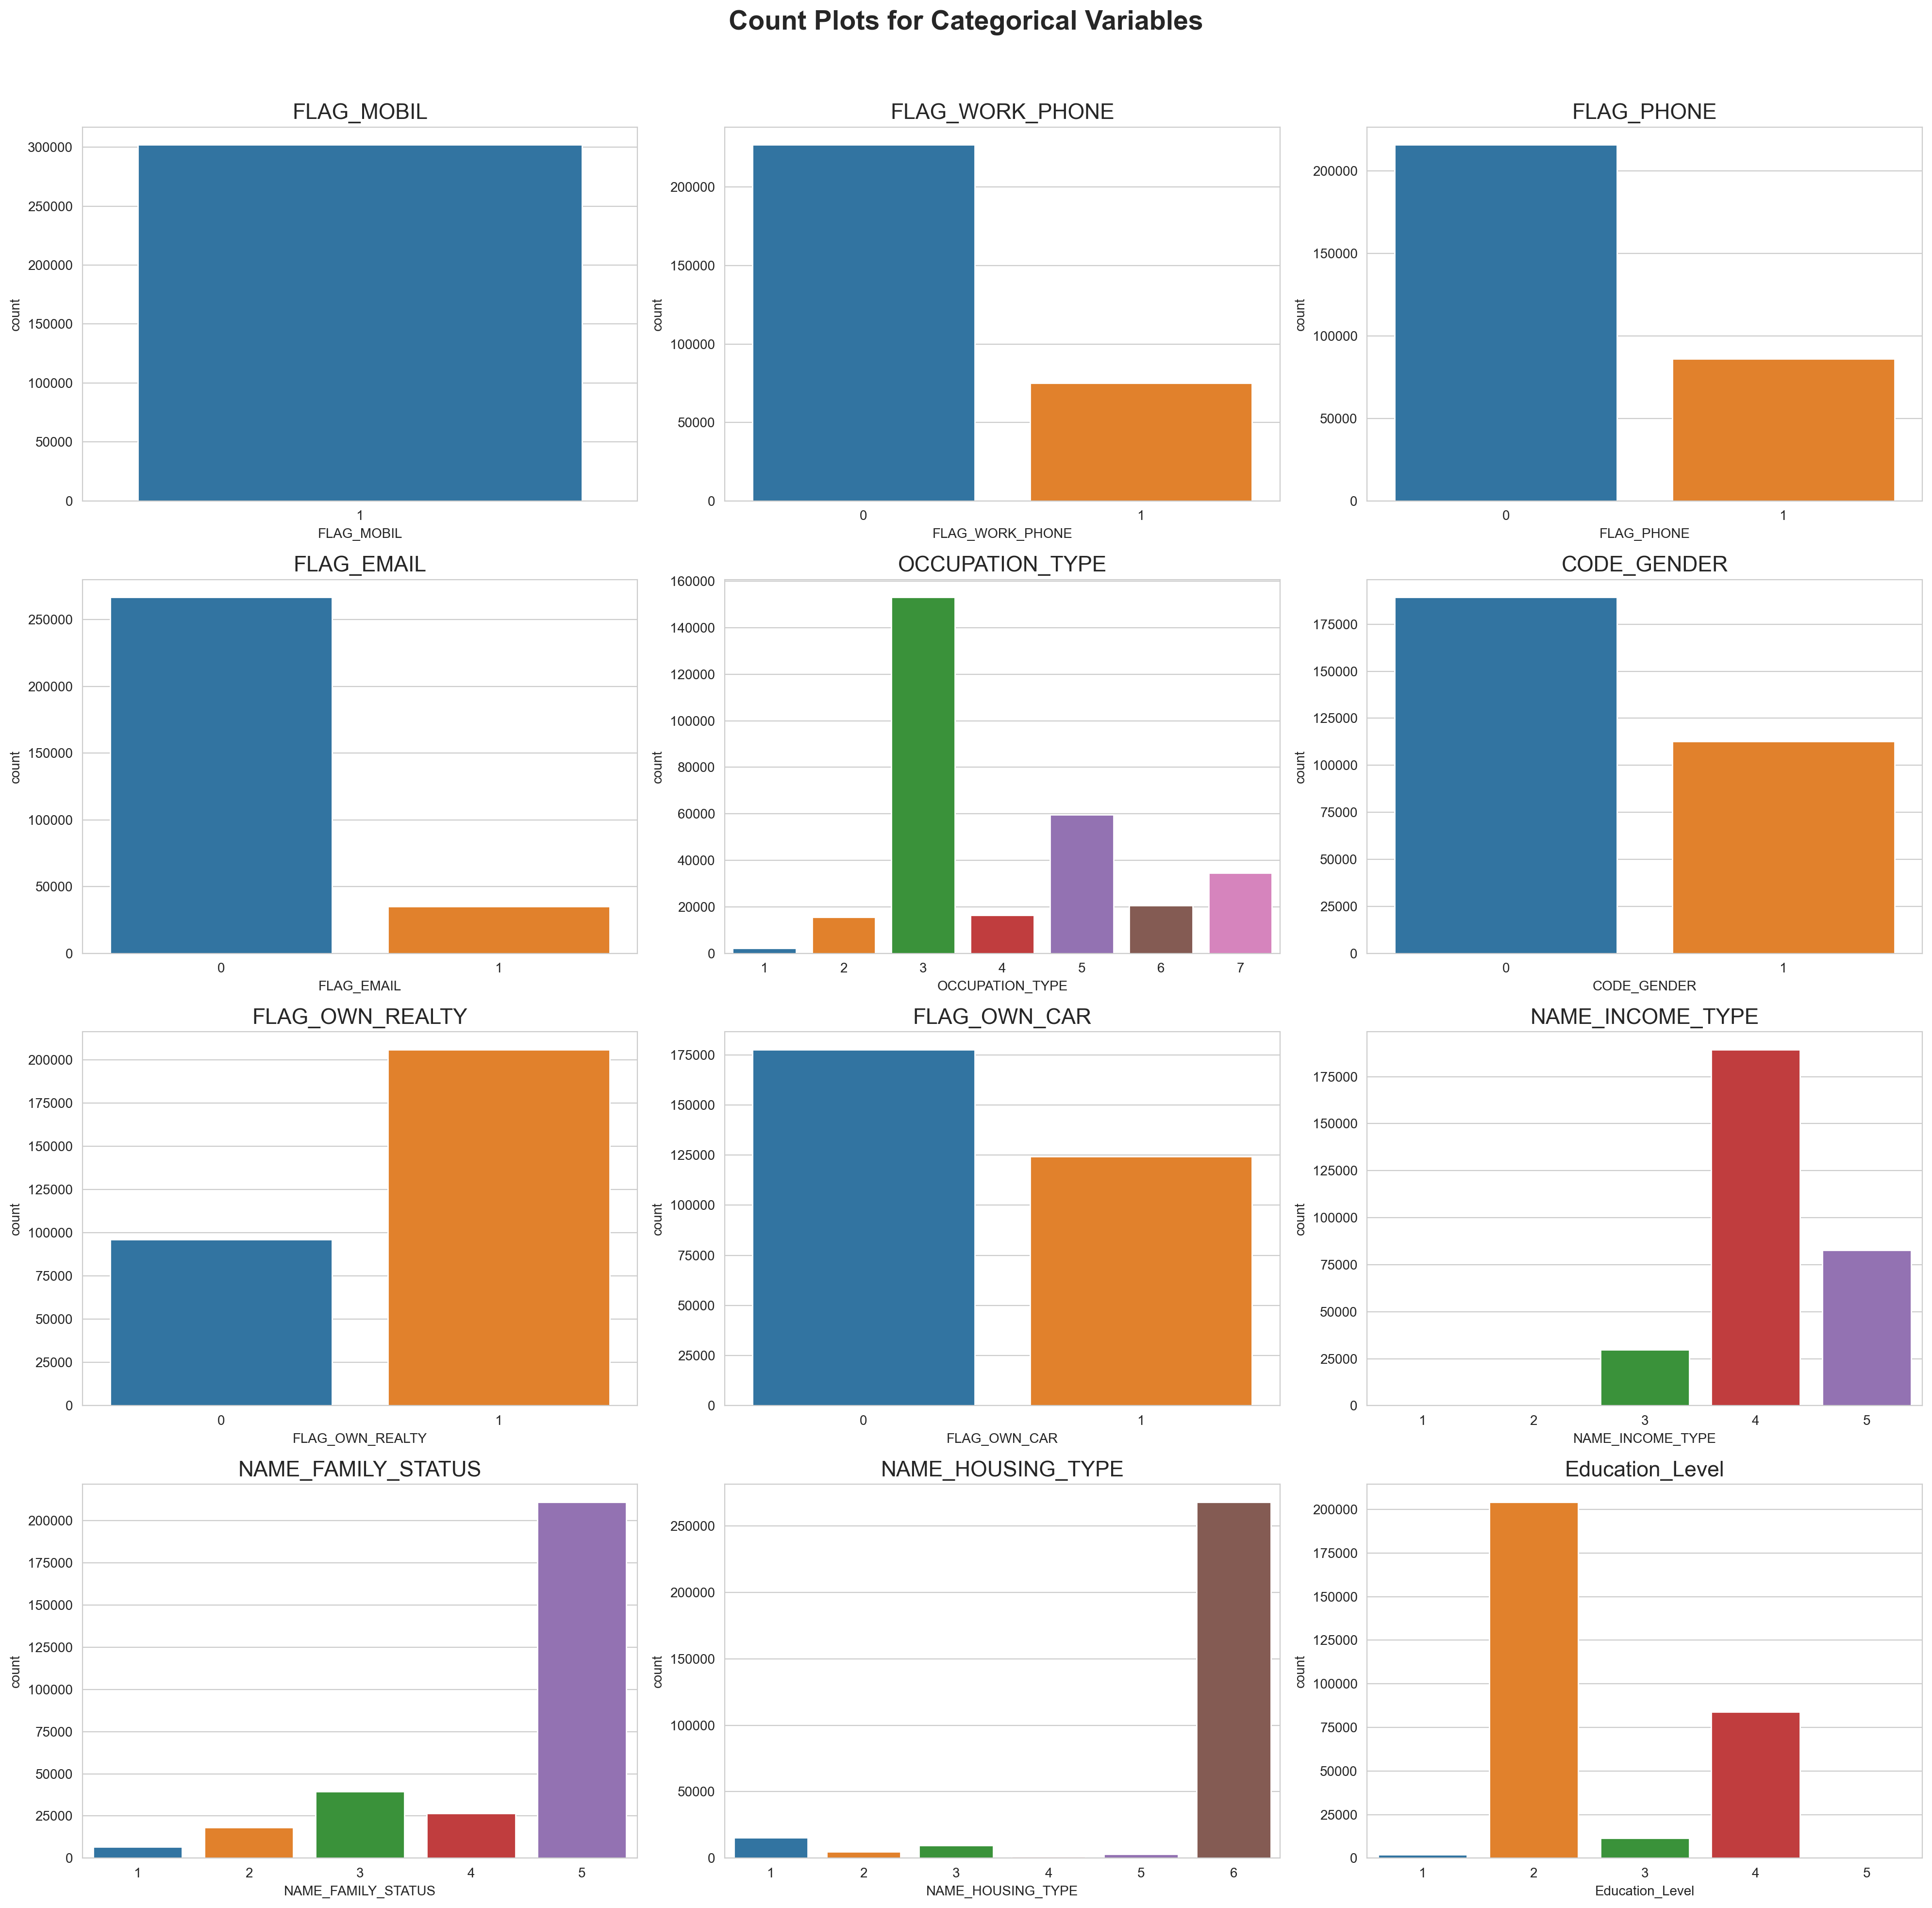

In [31]:
# Calculate the number of rows needed based on the number of columns
n_cols = 3
n_rows = (len(class_cols) + n_cols - 1) // n_cols

# Create a subplot grid with the calculated number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), dpi=200)

fig.suptitle('Count Plots for Categorical Variables', fontsize=20, fontweight='bold')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical column and create a count plot
for i, col in enumerate(class_cols):
    sns.countplot(x=col, data=data1, ax=axes[i])
    axes[i].set_title(col, fontsize=16)

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to ensure subplots fit within the figure area without overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [32]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,301998.00,6023139.32,569864.07,5008806.00,5617654.75,6047956.50,6450995.75,7999952.00
CODE_GENDER,301998.00,0.37,0.48,0.00,0.00,0.00,1.00,1.00
FLAG_OWN_CAR,301998.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
FLAG_OWN_REALTY,301998.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
CNT_CHILDREN,301998.00,0.51,0.77,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,301998.00,189446.88,87299.13,27000.00,135000.00,180000.00,225000.00,585000.00
NAME_INCOME_TYPE,301998.00,4.17,0.59,1.00,4.00,4.00,5.00,5.00
NAME_FAMILY_STATUS,301998.00,4.38,1.06,1.00,4.00,5.00,5.00,5.00
NAME_HOUSING_TYPE,301998.00,5.57,1.29,1.00,6.00,6.00,6.00,6.00
DAYS_BIRTH,301998.00,40.54,9.56,20.52,32.70,39.92,47.76,67.86


## Credit Record EDA

- Month_Balance
    - The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

- STATUS
    - 0: 1-29 days past due 
    - 1: 30-59 days past due 
    - 2: 60-89 days overdue 
    - 3: 90-119 days overdue 
    - 4: 120-149 days overdue 
    - 5: Overdue or bad debts, write-offs for more than 150 days 
    - C: paid off that month 
    - X: No loan for the month

In [33]:
data2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [34]:
# Define a mapping from status codes to point values
status_points = {'0': 2, '1': 0, '2': -2, '3': -5, '4': -10, '5': -20, 'C': 5, 'X': 3}

# Map the 'STATUS' column to point values using the defined mapping
data2['Points'] = data2['STATUS'].map(status_points)

# Group by 'ID' and sum the points for each group
scores_series = data2.groupby('ID')['Points'].sum()

# Reset the index of the series to create a DataFrame with 'ID' and 'Scores'
scores_df = scores_series.reset_index(name='Scores')

scores_df

,ID,Scores
0,5001711,9
1,5001712,65
2,5001713,66
3,5001714,45
4,5001715,180
...,...,...
45980,5150482,54
45981,5150483,54
45982,5150484,29
45983,5150485,4


In [35]:
# Define a function to evaluate credit ratings based on scores.
def credit_rating(score):
    if score > 100:
        return 'Good'
    elif score >= 0:
        return 'Average'
    else:
        return 'Bad'

# Apply this function to the 'Scores' column and create a new column 'Credit_Rating'
scores_df['Credit_Rating'] = scores_df['Scores'].apply(credit_rating)

# Drop the 'ID' column from the dataframe
scores_df.drop('Scores', axis=1, inplace=True)

scores_df

,ID,Credit_Rating
0,5001711,Average
1,5001712,Average
2,5001713,Average
3,5001714,Average
4,5001715,Good
...,...,...
45980,5150482,Average
45981,5150483,Average
45982,5150484,Average
45983,5150485,Average


In [36]:
scores_df['Credit_Rating'].describe()

count       45985
unique          3
top       Average
freq        31819
Name: Credit_Rating, dtype: object

In [37]:
# Merge data1 with scores_df on the 'ID' column, using a left join
merge_df = pd.merge(data1, scores_df, on='ID', how='left')

# Drop rows where 'Scores' is NaN
merge_df = merge_df.dropna(subset=['Credit_Rating'])

merge_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Education_Level,Credit_Rating
0,5008806,1,1,1,0,112500.00,4,5,6,58.83,3.11,1,0,0,0,3,2.00,2,Average
1,5008808,0,0,1,0,270000.00,5,3,6,52.36,8.36,1,0,1,1,3,1.00,2,Average
2,5008809,0,0,1,0,270000.00,5,3,6,52.36,8.36,1,0,1,1,3,1.00,2,Average
3,5008810,0,0,1,0,270000.00,5,3,6,52.36,8.36,1,0,1,1,3,1.00,2,Good
4,5008811,0,0,1,0,270000.00,5,3,6,52.36,8.36,1,0,1,1,3,1.00,2,Good
5,5008815,1,1,1,0,270000.00,4,5,6,46.22,2.11,1,1,1,1,5,2.00,4,Average
6,5112956,1,1,1,0,270000.00,4,5,6,46.22,2.11,1,1,1,1,5,2.00,4,Average
8,5008819,1,1,1,0,135000.00,5,5,6,48.71,3.27,1,0,0,0,3,2.00,2,Average
9,5008820,1,1,1,0,135000.00,5,5,6,48.71,3.27,1,0,0,0,3,2.00,2,Average
10,5008821,1,1,1,0,135000.00,5,5,6,48.71,3.27,1,0,0,0,3,2.00,2,Average


In [38]:
# Remove useless column
merge_df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

now all the columns are numerical

In [39]:
merge_df.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Education_Level
count,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00,24894.00
mean,5078872.93,0.38,0.42,0.65,0.51,189229.69,4.18,4.37,5.53,40.49,7.19,1.00,0.29,0.10,4.06,2.29,2.59
std,41924.35,0.48,0.49,0.48,0.79,85550.60,0.59,1.06,1.35,9.54,6.42,0.00,0.45,0.30,1.52,0.95,0.91
min,5008806.00,0.00,0.00,0.00,0.00,27000.00,1.00,1.00,1.00,20.52,0.05,1.00,0.00,0.00,1.00,1.00,1.00
25%,5042245.25,0.00,0.00,0.00,0.00,135000.00,4.00,4.00,6.00,32.75,2.68,1.00,0.00,0.00,3.00,2.00,2.00
50%,5079010.50,0.00,0.00,1.00,0.00,180000.00,4.00,5.00,6.00,39.82,5.30,1.00,0.00,0.00,3.00,2.00,2.00
75%,5115604.75,1.00,1.00,1.00,1.00,225000.00,5.00,5.00,6.00,47.73,9.53,1.00,1.00,0.00,5.00,3.00,4.00
max,5150487.00,1.00,1.00,1.00,19.00,585000.00,5.00,5.00,6.00,67.43,43.05,1.00,1.00,1.00,7.00,20.00,5.00


## Classifier Model Building

Since there is no target variable in the application record, we will use the credit record to build a predictive model.

In [40]:
scaler = StandardScaler()
# Scale the continuous columns in merge_df
merge_df[conti_cols] = scaler.fit_transform(merge_df[conti_cols])

Credit_type_mapping = {
    'Good': 2,
    'Average': 1,
    'Bad': 0
}
# Code the 'Credit_Rating' column
merge_df['Credit_Rating'] = merge_df['Credit_Rating'].map(Credit_type_mapping)

In [41]:
# Drop the 'ID' column from the dataframe
# merge_df.drop('ID', axis=1, inplace=True)

# Define the feature matrix 'X' and the target variable 'y'
y = merge_df['Credit_Rating']
X = merge_df.drop('Credit_Rating', axis=1)


# Split the data into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Education_Level
30979,5136960,0,0,0,2,0.42,4,3,6,-0.53,1.42,1,0,0,4,3.00,4
31046,5137070,1,1,0,1,1.47,5,5,1,-0.89,-0.81,1,1,0,6,3.00,4
4596,5025712,1,1,1,2,-0.48,4,5,6,-0.89,-0.87,1,0,0,3,4.00,2
10790,5045834,0,0,0,1,0.94,4,2,6,0.50,-0.70,1,0,0,5,2.00,2
8749,5036967,1,1,1,0,0.94,4,5,6,2.07,2.17,1,1,0,7,2.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30491,5132951,0,0,1,1,-0.37,3,3,6,-0.60,-0.54,1,0,0,2,2.00,2
8442,5036797,1,1,0,1,0.42,5,5,6,0.56,-0.09,1,0,0,7,3.00,2
959,5010362,1,1,0,0,-1.16,5,3,6,-0.69,-0.26,1,1,0,3,1.00,2
22109,5095726,1,1,0,1,-0.63,5,5,6,-1.54,-0.52,1,0,0,3,3.00,2


### CART Model

In [43]:
# Create a DecisionTreeClassifier (CART) model
cart_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
cart_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = cart_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the accuracy and the results DataFrame
print(f"Accuracy: {accuracy}")
print(results)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

Accuracy: 0.6925085358505724
       Actual  Predicted
28564       1          2
33490       1          2
25435       1          1
19891       2          1
16502       1          1
...       ...        ...
2282        1          2
12335       1          1
30807       1          1
22080       2          2
26979       2          1

[4979 rows x 2 columns]

Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.21      0.18        14
           1       0.80      0.78      0.79      3610
           2       0.45      0.47      0.46      1355

    accuracy                           0.69      4979
   macro avg       0.47      0.49      0.48      4979
weighted avg       0.70      0.69      0.70      4979


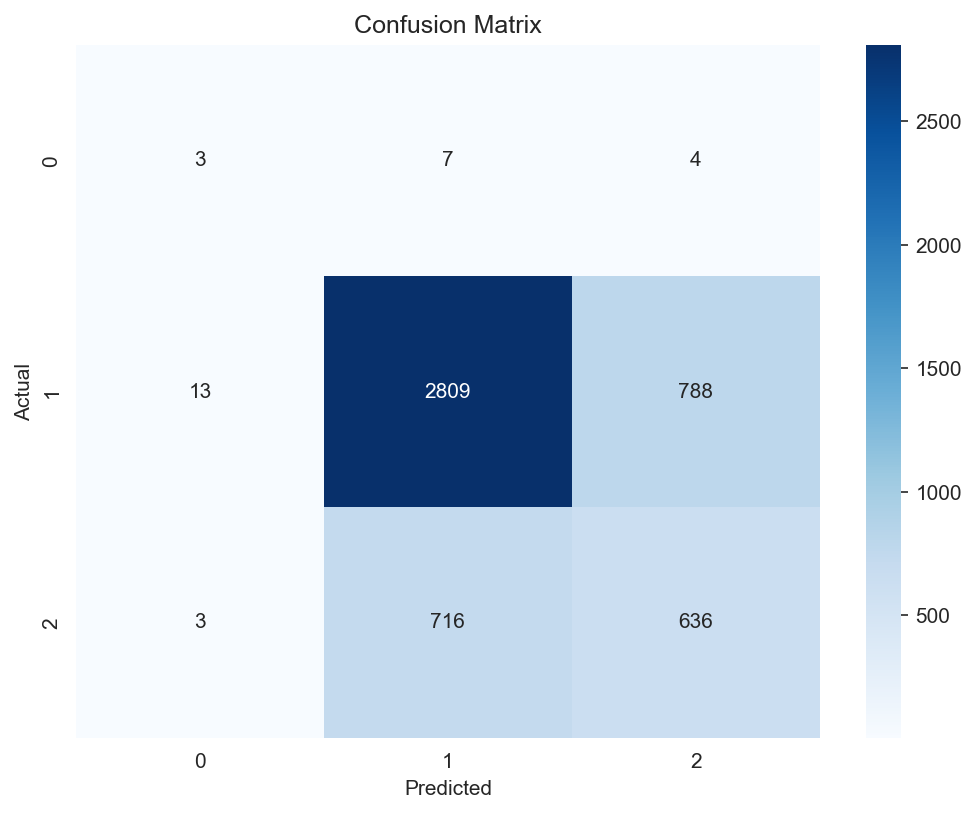

In [44]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6), dpi = 150)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cart_model.classes_, yticklabels=cart_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Logistic Model

In [45]:
# Initialize the Logistic Regression model
log_model = LogisticRegression()

# Fit the model on the training data
log_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the accuracy and the results DataFrame
print(f"Accuracy: {accuracy}")
print(results)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print("\nClassification Report:")
print(class_report)

Accuracy: 0.725045189797148
       Actual  Predicted
28564       1          1
33490       1          1
25435       1          1
19891       2          1
16502       1          1
...       ...        ...
2282        1          1
12335       1          1
30807       1          1
22080       2          1
26979       2          1

[4979 rows x 2 columns]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.73      1.00      0.84      3610
           2       1.00      0.00      0.00      1355

    accuracy                           0.73      4979
   macro avg       0.91      0.33      0.28      4979
weighted avg       0.80      0.73      0.61      4979


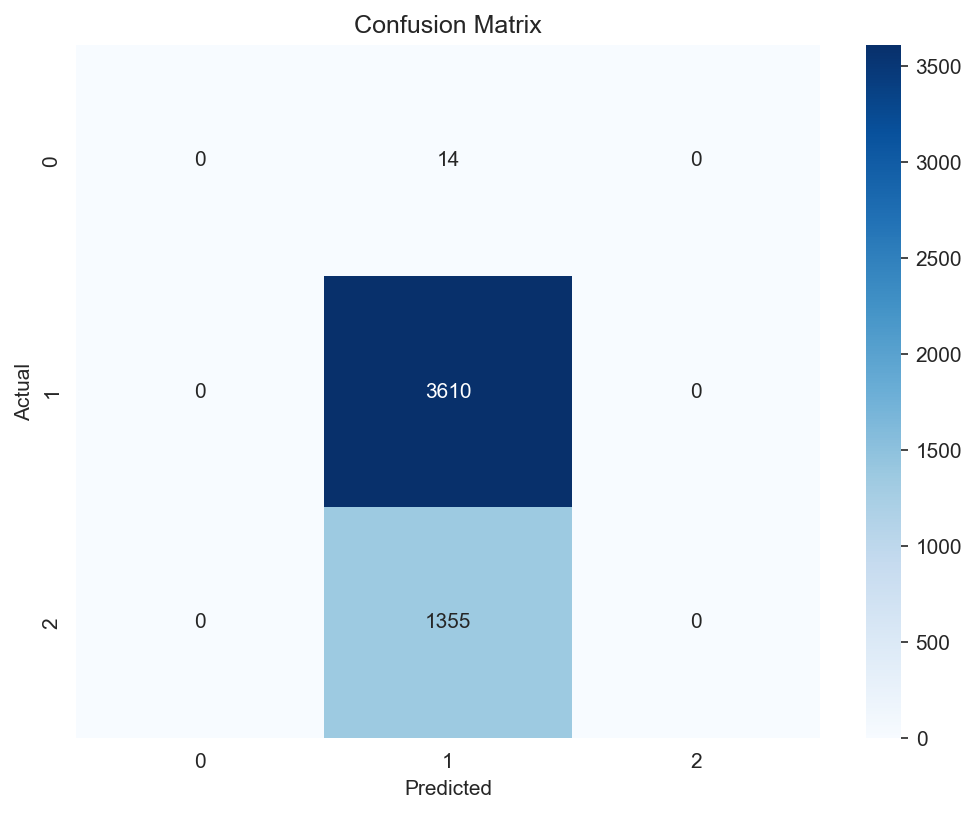

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6), dpi = 150)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()